Popularity Model: As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up. The problem is that, it might not give personalized recommendations.This model works well most of the times because people like things other people might like. For e.g: Many people have watched Dragon Ball Z. There are so many pop culture references about DBZ that people who generally dont like anime might have watched/ would prefer watching the show.

Content Based Filtering Algorithm: This method will try to find similarities between the content ( Anime series in this case) using attributes and metadata about the content and try to recommend items with highest similarity to what our active user liked in the past.

Collaborative filtering algorithm: This method will try to find similar users like the active user (the user for whom we are going to make predictions). Based on certain similarity metrics, we then suggest items ( anime titles in our case) that the similar users liked(gave higher ratings to) which were not rated by our active users.

In [1]:
import numpy as np 
import pandas as pd 
pd.options.display.max_rows = 4000 
from sklearn.metrics.pairwise import cosine_similarity

import os 
for dirname, _, filenames in os.walk('Data'):
    for filename in filenames: 
        print(os.path.join(dirname, filename))
        

Data\anime.csv
Data\rating.csv


In [2]:
anime_data = pd.read_csv('Data/anime.csv')
rating_data = pd.read_csv('Data/rating.csv')

EXPLORING OUR DATA 

In [3]:
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime_data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [5]:
rating_data.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
rating_data.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [7]:
rating_data.rating.replace(-1, np.NaN, inplace = True)

In [8]:
print('Anime Data')
for i in anime_data.columns: 
    print('Null counts in the column',i,':',sum(anime_data[i].isna()))
    
print('\n Rating Data')
for i in rating_data.columns: 
    print('Null counts in the column',i,':',sum(rating_data[i].isna()))

Anime Data
Null counts in the column anime_id : 0
Null counts in the column name : 0
Null counts in the column genre : 62
Null counts in the column type : 25
Null counts in the column episodes : 0
Null counts in the column rating : 230
Null counts in the column members : 0

 Rating Data
Null counts in the column user_id : 0
Null counts in the column anime_id : 0
Null counts in the column rating : 1476496


In [9]:
anime_data.genre.replace(np.NaN,'None_Genre',inplace = True)
anime_data.type.replace(np.NaN,'None_type',inplace = True)
anime_data.episodes.replace('Unknown',np.NaN,inplace = True)

EDA on anime_data 

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats 
import itertools 
import collections 
import operator 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import minmax_scale

C:\Users\guddu\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Average Rating: 6.473901690981445


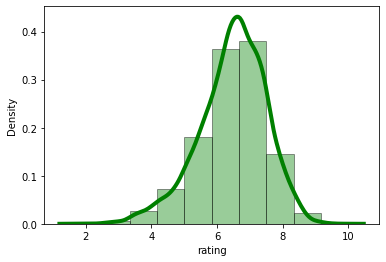

In [11]:
sns.distplot(anime_data['rating'], hist = True, kde = True, bins = 10, color = 'green', hist_kws ={'edgecolor':'black'}, kde_kws ={'linewidth':4})
print('Average Rating:', anime_data['rating'].mean())

C:\Users\guddu\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Average members: 18071.33886448674
Max members: 1013917
Min members: 5
Median members: 1550.0


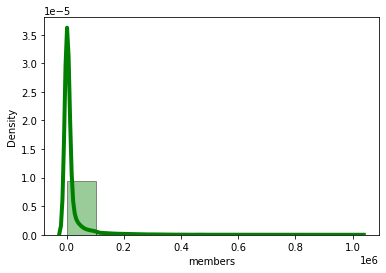

In [12]:
sns.distplot (anime_data['members'], hist = True, kde = True, 
             bins = 10, color = 'green', 
             hist_kws = {'edgecolor':'black'},
             kde_kws = {'linewidth': 4})
print('Average members:', anime_data['members'].mean())
print('Max members:', anime_data['members'].max())
print('Min members:', anime_data['members'].min())
print('Median members:', anime_data['members'].median())

In [13]:
anime_data.sort_values('members', ascending = False).head(10)

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


In [14]:
anime_data.sort_values('members',ascending = True).head(10)

,anime_id,name,genre,type,episodes,rating,members
10997,34527,Gou-chan. Moko to Chinjuu no Mori no Nakama-tachi,"Adventure, Kids",Movie,1,NaN,5
10990,34485,Ganko-chan,None_Genre,None_type,NaN,NaN,11
10444,34490,Sushi Azarashi,Comedy,TV,30,3.00,12
10424,33320,Suijun Genten,None_Genre,Movie,1,7.00,13
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10719,33319,Wareware no Heya,None_Genre,Movie,1,8.00,15
8367,34259,Chotto Ugoku!? &quot;Futeneko&quot;,Comedy,OVA,1,6.00,17
10989,34488,Gan Gan Ganko-chan,"Comedy, Kids, Sci-Fi",TV,NaN,NaN,19
9805,34363,Ocha-ken: Ryokutto Monogatari,"Kids, Slice of Life",TV,13,8.00,20
9701,33826,Neko no Kuni no Kenpou,Historical,OVA,1,7.33,20


In [15]:
anime_data.episodes = pd.to_numeric(anime_data.episodes, errors = 'coerce')

C:\Users\guddu\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Average Episode Count: 12.382549774134182
Max Episode Count: 1818.0
Min Episode Count: 1.0
Median Episode Count: 2.0


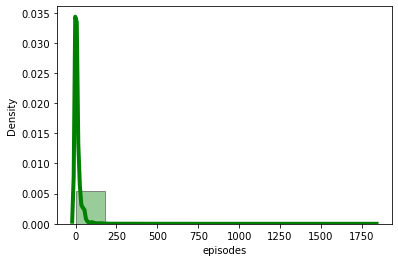

In [16]:
sns.distplot(anime_data['episodes'], hist = True, kde = True,
            bins = 10, color = 'green', 
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
print('Average Episode Count:', anime_data['episodes'].mean())
print('Max Episode Count:', anime_data['episodes'].max())
print('Min Episode Count:', anime_data['episodes'].min())
print('Median Episode Count:', anime_data['episodes'].median())

In [17]:
anime_data.sort_values('episodes', ascending = False).head(10)

,anime_id,name,genre,type,episodes,rating,members
6296,12393,Oyako Club,"Comedy, Slice of Life",TV,1818.0,6.18,160
929,2471,Doraemon (1979),"Adventure, Comedy, Fantasy, Kids, Sci-Fi, Shounen",TV,1787.0,7.76,14233
9243,23349,Kirin Monoshiri Yakata,Kids,TV,1565.0,5.56,116
5360,6277,Manga Nippon Mukashibanashi (1976),"Fantasy, Historical",TV,1471.0,6.48,406
6580,8213,Hoka Hoka Kazoku,Comedy,TV,1428.0,6.05,194
9242,32448,Kirin Ashita no Calendar,"Historical, Kids",TV,1306.0,6.43,59
9613,22221,Monoshiri Daigaku: Ashita no Calendar,Historical,TV,1274.0,6.80,112
10165,10241,Sekai Monoshiri Ryoko,Comedy,TV,1006.0,5.92,153
9317,20117,Kotowaza House,"Comedy, Slice of Life",TV,773.0,5.63,110
6118,9768,Shima Shima Tora no Shimajirou,"Adventure, Comedy, Fantasy, Kids, Magic",TV,726.0,6.25,237


In [18]:
anime_data['type'].value_counts()

TV           3787
OVA          3311
Movie        2348
Special      1676
ONA           659
Music         488
None_type      25
Name: type, dtype: int64

Average rating for Movie anime: 6.318058336961246
Average rating for TV anime: 6.902299101062382
Average rating for OVA anime: 6.375220700152198
Average rating for Special anime: 6.523500897666066
Average rating for Music anime: 5.588995901639343
Average rating for ONA anime: 5.643297546012272
Average rating for None_type anime: nan


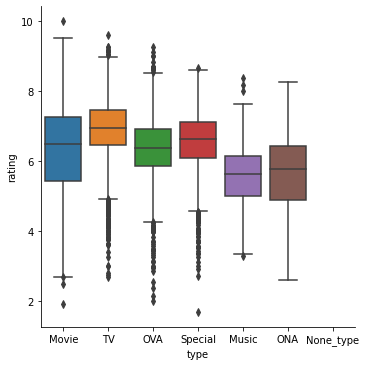

In [19]:
sns.catplot(x="type", y="rating", kind="box", data=anime_data)

for i in anime_data['type'].unique():
    print('Average rating for', i, 'anime:', anime_data[anime_data.type == i]['rating'].mean())

We notice that, on an average rating for TV anime is higher than 7. 
Average rating for Musical Anime is around 5.5 

In [20]:
anime_data['genre'] = anime_data['genre'].apply(lambda x : x.split(', '))

[Text(0, 0.5, 'Genre'), Text(0.5, 0, 'Count')]

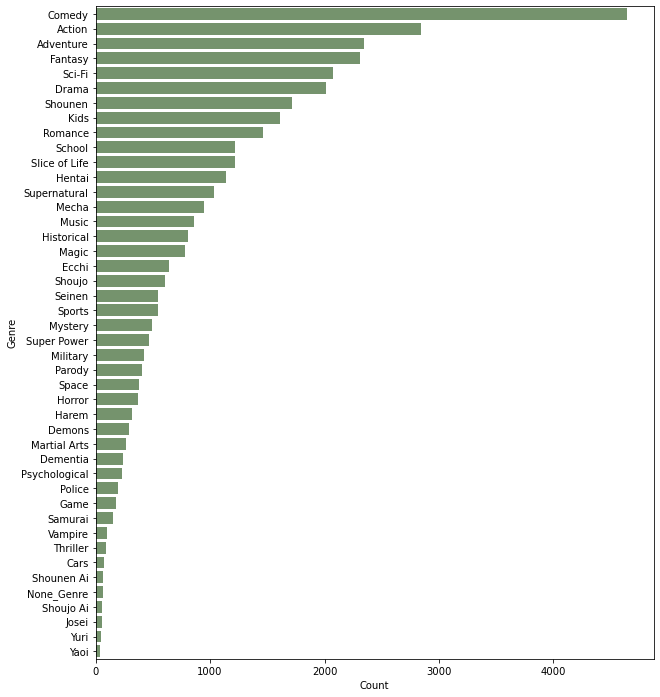

In [21]:
genre_data = itertools.chain(*anime_data['genre'].values.tolist())
genre_counter = collections.Counter(genre_data)
genres = pd.DataFrame.from_dict(genre_counter,orient='index').reset_index()
genres.columns=['Genre','Counts']
genres.sort_values('Counts', ascending=False, inplace=True)

f, ax = plt.subplots(figsize=(10,12))
sns.barplot(x="Counts", y="Genre", data=genres, color='#719967')
ax.set(ylabel='Genre',xlabel="Count")

Our list mostly comprises of comedy anime titles, followed by Action, adventure and fantasy titles. 

In [22]:
genre_rating = []
for i in list(genres['Genre']):
    genre_rating.append(anime_data[anime_data['genre'].str.contains(i, regex = False)]['rating'].mean())
    
genre_rating_dict = pd.DataFrame({'Genre': list(genres['Genre']), 
                                 'rating': genre_rating })
genre_rating_dict.sort_values('rating', ascending = False, inplace = True)

[Text(0, 0.5, 'Genre'), Text(0.5, 0, 'Rating')]

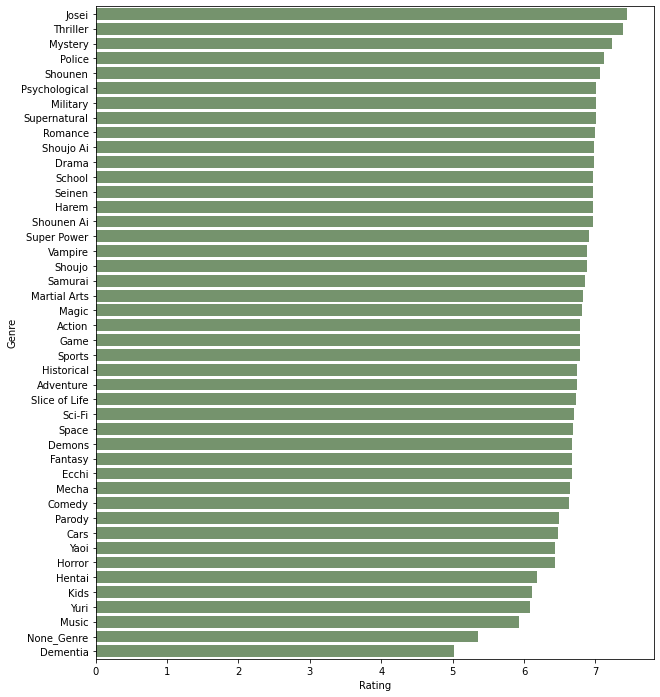

In [23]:
f, ax = plt.subplots(figsize=(10,12))
sns.barplot(x="rating", y="Genre", data = genre_rating_dict, color = '#719967')
ax.set(ylabel = 'Genre', xlabel = "Rating")

Not much variation in average ratings for different genres. 
1. Josei anime tends to have a higher rating averaging at 7 point. This can also be because these anime titles have lower number of titles. 
2. Dementia anime series are at the tail end of rating and average on around 5 points. 
3. Most of the remaining anime titles are averaging between 6-7 points. 

EDA ON RATING DATASET 

In [24]:
rating_anime = rating_data.merge(anime_data[['name', 'genre', 'anime_id', 'type', 'episodes', 'members']], left_on = 'anime_id', right_on = 'anime_id')

In [25]:
top_rated = rating_anime.groupby(['anime_id', 'name']).count()['user_id'].reset_index().sort_values('user_id',ascending = False)
top_rated.head(10)

,anime_id,name,user_id
1389,1535,Death Note,39340
6606,11757,Sword Art Online,30583
7439,16498,Shingeki no Kyojin,29584
1427,1575,Code Geass: Hangyaku no Lelouch,27718
201,226,Elfen Lied,27506
4630,6547,Angel Beats!,27183
10,20,Naruto,25925
99,121,Fullmetal Alchemist,25032
3965,5114,Fullmetal Alchemist: Brotherhood,24574
3558,4224,Toradora!,24283


We see that the top 10 numbers are some of the higher and more mainstream anime titles like Naruto, Code Geass and Attack on Titan (Shingeki no Kyojin). This list does look similar to the list in the anime_data table. 

C:\Users\guddu\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='user_id', ylabel='Density'>

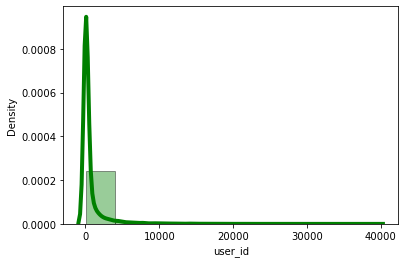

In [26]:
sns.distplot(top_rated['user_id'], hist = True, kde= True, 
            bins = 10, color = 'green',
            hist_kws = {'edgecolor':'black'}, 
            kde_kws = {'linewidth':4})

POPULARITY BASED RECOMMENDER SYSTEM 

For our popularity based recommender system, we will be writing a function which takes the following parameters:

N= Number of Shows to recommend

Genre = A list of genres that the recommender system should recommend out of. By default, it will take all genre into consideration

Type = A list of the type of show that the user wants (e.g TV, Movie, OVA etc). By default, it will take all types into consideration

episodes_more_than an integer value which indicates how many integers that particular anime show should be more than. e.g for a value of 50, the system should only show the shows which have more than 50 episodes. by default, it is set to 0.

Popularity Weight = A value between 0 to 1. A value of 1 means all the recommendations will be based on the popularity of the show. A value of 0 means all the recommendations will be based on the rating for the show. A value of 0.6 means, the popularity will be given a 60% weightage and 40% weightage will be given to the rating of a show

In [27]:
def popularity_recommender(dataset,N = 0, 
                           Genre =[],
                           Type= [],
                           episodes_more_than=0,
                           popularity_weight= 0.5
                          ):    
    if len(Genre)==0:
        Genre = ['Josei', 'Thriller', 'Mystery', 'Police', 'Shounen', 'Psychological', 'Military', 'Supernatural', 'Romance', 'Shoujo Ai', 'Drama', 'School', 'Seinen', 'Harem', 'Shounen Ai', 'Super Power', 'Vampire', 'Shoujo', 'Samurai', 'Martial Arts', 'Magic', 'Action', 'Game', 'Sports', 'Historical', 'Adventure', 'Slice of Life', 'Sci-Fi', 'Space', 'Demons', 'Fantasy', 'Ecchi', 'Mecha', 'Comedy', 'Parody', 'Cars', 'Yaoi', 'Horror', 'Hentai', 'Kids', 'Yuri', 'Music', 'None_Genre', 'Dementia']
    if len(Type) ==0:
        Type = ['ONA', 'None_type', 'OVA', 'Special', 'Music', 'Movie', 'TV']

    pop_recommender_df = dataset[
    (dataset.episodes>=episodes_more_than) &
    (dataset.genre.apply(len) !=(dataset.genre.apply(set)- set(Genre)).apply(len)) &
    (dataset.type.isin(Type)) ].copy()
       
    if len(pop_recommender_df)==0:
        print('No anime found with such conditions')

    else:
        # anime rating is in a range of 1 to 10 while popularity/members is in a larger range. 
        # because we want to show good shows with higher popularity, we will scale popularity on a range of 1 to 10 
        # we shall be giving 70% weight to the popularity metric and 30% weight to show rating and calculate a new score called Popularity_quality_index
        pop_recommender_df['scaled_members']=(minmax_scale(pop_recommender_df.members))*10
        pop_recommender_df['Popularity_quality_index']=(popularity_weight* pop_recommender_df.scaled_members)+(1-popularity_weight)*pop_recommender_df.rating
        df=pop_recommender_df.sort_values('Popularity_quality_index', ascending=False).iloc[0:N]
        cols =['name','genre','type','episodes','rating','members']
        return(df[cols])

In [28]:
genre_list = ['Action']
Type_list = ['TV']
popularity_recommender(anime_data,
                      Genre = genre_list, 
                      episodes_more_than = 0, 
                      Type = Type_list, 
                      N = 20, 
                      popularity_weight = 0.6) 

,name,genre,type,episodes,rating,members
86,Shingeki no Kyojin,"[Action, Drama, Fantasy, Shounen, Super Power]",TV,25.0,8.54,896229
804,Sword Art Online,"[Action, Adventure, Fantasy, Game, Romance]",TV,25.0,7.83,893100
1,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64.0,9.26,793665
19,Code Geass: Hangyaku no Lelouch,"[Action, Mecha, Military, School, Sci-Fi, Supe...",TV,25.0,8.83,715151
159,Angel Beats!,"[Action, Comedy, Drama, School, Supernatural]",TV,13.0,8.39,717796
841,Naruto,"[Action, Comedy, Martial Arts, Shounen, Super ...",TV,220.0,7.81,683297
445,Mirai Nikki (TV),"[Action, Mystery, Psychological, Shounen, Supe...",TV,26.0,8.07,657190
13,Code Geass: Hangyaku no Lelouch R2,"[Action, Drama, Mecha, Military, Sci-Fi, Super...",TV,25.0,8.98,572888
449,Tokyo Ghoul,"[Action, Drama, Horror, Mystery, Psychological...",TV,12.0,8.07,618056
582,Bleach,"[Action, Comedy, Shounen, Super Power, Superna...",TV,366.0,7.95,624055


Looks really good! We can see some of the popular anime titles in the list. Because we have the ability to assign weights and tune our list of recommendations, and subset our results, its a very easy and intuitive solution. However, this method won't give you personalised recommendations. 

DATA CLEANING AND CREATING TRAINING DATASET 

In [29]:
print('Original rating data size:',rating_data.shape[0])
rating_data_clean = rating_data[rating_data.rating.notna()].reset_index(drop = True).copy()

print('Rating data after removing NA Ratings:',rating_data_clean.shape[0])

anime_rating_counts = pd.DataFrame(rating_data_clean.groupby('anime_id')['user_id'].nunique()).reset_index()
req_anime_ids= anime_rating_counts[anime_rating_counts['user_id']>250].anime_id
user_rating_counts=pd.DataFrame(rating_data_clean.groupby('user_id')['anime_id'].nunique()).reset_index()
req_user_ids= user_rating_counts[user_rating_counts['anime_id']>250].user_id

rating_clean=rating_data_clean[rating_data_clean.anime_id.isin(req_anime_ids) &
                              rating_data_clean.user_id.isin(req_user_ids)].copy().reset_index(drop = True)
print('Rating_data after filtering Anime Shows and Users:',rating_clean.shape[0])

Original rating data size: 7813737
Rating data after removing NA Ratings: 6337241
Rating_data after filtering Anime Shows and Users: 2368822


In [30]:
train_df, test_df = train_test_split(rating_clean, 
                                    test_size = 0.20, 
                                    random_state = 27)

CONTENT BASED RECOMMENDER SYSTEM 

In [37]:
anime_genre_dummies= pd.get_dummies(anime_data.genre.apply(pd.Series).stack()).sum(level=0)
anime_genre_dummies=pd.concat([anime_data, anime_genre_dummies], axis=1)

In [38]:
def get_episode_encoding(num_episodes):
    if(num_episodes<=13):
        return('Xsmall')
    elif (num_episodes<=50):
        return('Small')
    elif (num_episodes<=250):
        return('Medium')
    elif (num_episodes<=500):
        return('Long')
    else:
        return('Xlong')

In [39]:
anime_genre_dummies = pd.concat([anime_genre_dummies,pd.get_dummies(anime_data.type)],axis = 1)

anime_genre_dummies = pd.concat([anime_genre_dummies,pd.get_dummies(anime_genre_dummies.episodes.apply(get_episode_encoding))],axis=1)

req_cols = list(set(anime_genre_dummies.columns) -set(['anime_id','name','genre','type','episodes','rating','members']))
req_cols.sort()

anime_genre_dummies['Encoding']=anime_genre_dummies[req_cols].values.tolist()
anime_genre_dummies

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,ONA,OVA,Special,TV,Long,Medium,Small,Xlong,Xsmall,Encoding
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1.0,9.37,200630,0,0,0,...,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64.0,9.26,793665,1,1,0,...,0,0,0,1,0,1,0,0,0,"[1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51.0,9.25,114262,1,0,0,...,0,0,0,1,0,1,0,0,0,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24.0,9.17,673572,0,0,0,...,0,0,0,1,0,0,1,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51.0,9.16,151266,1,0,0,...,0,0,0,1,0,1,0,0,0,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,[Hentai],OVA,1.0,4.15,211,0,0,0,...,0,1,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
12290,5543,Under World,[Hentai],OVA,1.0,4.28,183,0,0,0,...,0,1,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
12291,5621,Violence Gekiga David no Hoshi,[Hentai],OVA,4.0,4.88,219,0,0,0,...,0,1,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,[Hentai],OVA,1.0,4.98,175,0,0,0,...,0,1,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."


This system will take the list of anime that the active user has watched. Based on the list of anime, we will try to find similar items in our list of anime. We are using Cosine similarity to find similarities between the active user's profile and the titles listed in our database

The function takes the following parameters:

user_profile = This will be the list of anime shows rated by our user
N = Number of recommendations to suggest to the Active User
movie_profile = Content database

In [40]:
def content_based_recommender(user_id,N,movie_profile):
   
    user_profile=rating_clean[rating_clean['user_id']==user_id].copy().reset_index(drop = True)
    user_profile = user_profile[user_profile.rating.notna()]
    cols_to_merge= list(set(movie_profile.columns)-set(['rating']))
    
    user_profile =pd.merge(user_profile[['anime_id','rating']],movie_profile[cols_to_merge]
             ,how= 'left', left_on='anime_id', right_on='anime_id')
    
    req_cols = list(set(movie_profile.columns) -set(['anime_id','name','genre','type','episodes','rating','members','Encoding']))
    req_cols.sort()
    
    user_profile['rating_scaled'] =  minmax_scale(user_profile['rating'])
    
    genre_weights=pd.DataFrame(user_profile[req_cols].multiply(user_profile['rating_scaled'],axis="index").sum()).reset_index()
    genre_weights.columns=['Genre','Weights']
    
    genre_weights['weights_scaled']=minmax_scale(genre_weights['Weights'])
    user_profile_weights= [list(genre_weights['weights_scaled'])]
    
    movie_profile['user_affinity']= cosine_similarity(user_profile_weights,list(movie_profile['Encoding']))[0]
    
    return(movie_profile.sort_values('user_affinity', ascending = False).reset_index().iloc[1:N][['name','genre','type','episodes','rating','members','user_affinity']])

In [41]:
rating_clean.user_id.unique()[1:15]

array([  7,  17,  38,  43,  46, 123, 139, 160, 210, 226, 235, 244, 248,
       256], dtype=int64)

In [42]:
content_based_recommender(user_id =17, N= 10,movie_profile = anime_genre_dummies.copy())

,name,genre,type,episodes,rating,members,user_affinity
1,Rewrite,"[Action, Comedy, Romance, School, Supernatural]",TV,13.0,6.69,71545,0.809412
2,Full Metal Panic? Fumoffu,"[Action, Comedy, School]",TV,12.0,8.21,171086,0.798954
3,Cheating Craft,"[Action, Comedy, School]",TV,12.0,5.86,23469,0.798954
4,Hidan no Aria,"[Action, Comedy, Romance, School]",TV,12.0,7.13,171888,0.797387
5,Heibai Wushang,"[Action, Comedy, Supernatural]",TV,12.0,7.60,216,0.794185
6,MonHun Nikki Girigiri Airou Mura G,"[Action, Comedy]",TV,13.0,6.46,311,0.793770
7,MonHun Nikki Girigiri Airou Mura: Airou Kiki I...,"[Action, Comedy]",TV,10.0,6.42,787,0.793770
8,Nanbaka,"[Action, Comedy, Drama]",TV,13.0,7.19,57325,0.793094
9,Mission-E,"[Action, Comedy, School, Sci-Fi]",TV,12.0,6.60,3931,0.787436


Based on the recommendations for user 17, we can see that the user really likes Action,Comedy and High School based Anime Shows (Mostly TV).

Note that the Content based Recommender System is not giving highly rated or popular anime series. This recommender system will provide items similar to the content that the user has seen and rated currently. Factors like: Genre, type of Anime and Number of episodes are the factors that the recommender system uses to find similar other content!

COLLABORATIVE FILTERING USING SURPRISE PACKAGE 

In [45]:
import surprise 
from surprise.model_selection import cross_validate 
from surprise import SVD, SVDpp, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, SlopeOne, Reader, Dataset 

ratings_dict = {'itemID': rating_clean.anime_id, 
               'userID': rating_clean.user_id, 
               'rating': rating_clean.rating}

df = pd.DataFrame(ratings_dict)

reader = Reader(rating_scale=(1,10))

data = Dataset.load_from_df(df[['userID','itemID','rating']], reader)
import time 
start = time.time()

benchmark = []
for algorithm in [SVD(), NMF()]: 
    
    results = cross_validate(algorithm, data, measures = ['RMSE'], cv = 3, verbose= True, n_jobs = 1)
    
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index = ['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
end = time.time()
print(end - start)


Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0948  1.0942  1.0974  1.0955  0.0014  
Fit time          88.09   84.38   84.32   85.59   1.76    
Test time         7.14    7.07    7.07    7.09    0.03    
Evaluating RMSE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.0999  2.0845  2.1029  2.0958  0.0080  
Fit time          99.60   92.08   91.68   94.45   3.64    
Test time         7.01    6.94    6.13    6.69    0.40    
606.6407973766327


Looks like the SVD model has the least RMSE Error. We will be using this model and fine tune it further over the whole dataset to see if we can improve the model performance. 

In [47]:
from collections import defaultdict 

from surprise import SVD 
from surprise import Dataset 

def get_top_n(predictions, n=10):
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions: 
        top_n[uid].append((iid,est))
        
    for uid, user_ratings in top_n.items(): 
        user_ratings.sort(key=lambda x:x[1], reverse = True)
        top_n[uid] = user_ratings[:n]
        
    return top_n 

ratings_dict = {'itemID': rating_clean.anime_id, 
                'userID': rating_clean.user_id, 
                'rating': rating_clean.rating}
df = pd.DataFrame(ratings_dict)

reader = Reader(rating_scale = (1,10))

data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

5 [2154, 7785, 1, 820, 467, 19, 227, 457, 30276, 1521]
7 [9969, 918, 9253, 820, 44, 19, 32281, 11577, 5420, 5114]
17 [918, 9969, 820, 28977, 15417, 11061, 15335, 5420, 32281, 6336]
38 [26, 199, 431, 24701, 21939, 820, 164, 572, 12029, 9253]
43 [731, 90, 9981, 11441, 23327, 32281, 33082, 4106, 107, 15059]
46 [47, 7711, 10500, 12431, 1943, 10029, 597, 16201, 5365, 6377]
123 [12365, 5114, 4181, 28977, 10030, 2904, 589, 9130, 9969, 431]
139 [820, 5420, 721, 3297, 338, 24701, 95, 22135, 801, 85]
160 [820, 32281, 5114, 12029, 22135, 31240, 10029, 6675, 1033, 11061]
210 [28891, 32935, 28977, 32281, 28725, 45, 15335, 777, 44, 9253]
226 [25731, 31680, 30300, 28285, 29027, 31051, 31637, 10491, 32051, 10717]
235 [32281, 15335, 4155, 918, 11917, 820, 32935, 28977, 5460, 11577]
244 [2904, 4181, 12365, 1575, 10030, 7674, 2167, 32935, 28977, 11061]
248 [5420, 3572, 32, 101, 1686, 820, 2418, 19, 578, 164]
256 [32281, 2904, 6288, 28977, 3927, 30230, 31051, 1575, 12859, 28701]
261 [23273, 32281, 10083, 

16197 [18857, 14807, 155, 19285, 20159, 21573, 1050, 1172, 1364, 21329]
16199 [820, 19, 5205, 44, 5114, 32281, 11061, 4282, 239, 2685]
16201 [11061, 13125, 5420, 2158, 6336, 85, 2164, 32281, 9969, 10153]
16202 [28977, 15335, 12355, 12365, 431, 11061, 32281, 433, 820, 2904]
16207 [401, 1030, 32281, 415, 9863, 10029, 12355, 11981, 16664, 1829]
16226 [3702, 6114, 4901, 268, 820, 6675, 267, 11771, 1519, 6594]
16228 [32281, 32935, 28977, 918, 24701, 338, 31240, 431, 9969, 3297]
16234 [12115, 1535, 777, 10218, 28977, 11061, 15417, 2994, 264, 12113]
16242 [918, 9969, 15335, 457, 28977, 820, 2904, 17389, 15417, 1604]
16246 [57, 240, 1210, 9969, 15417, 23199, 14407, 16700, 486, 3002]
16273 [4181, 820, 3297, 32281, 10012, 25835, 5941, 777, 11061, 918]
16284 [22043, 19815, 28701, 8086, 23755, 32281, 19123, 27655, 22145, 28927]
16303 [4789, 2924, 32281, 28977, 9062, 7222, 11981, 1530, 4938, 5310]
16308 [1575, 2904, 777, 5114, 2001, 4181, 7311, 44, 4565, 820]
16314 [23273, 31043, 32935, 30654, 3228

27093 [820, 15335, 15417, 9969, 28977, 918, 4789, 11981, 237, 6045]
27103 [32281, 28701, 28977, 11577, 18295, 31240, 31043, 16706, 44, 10863]
27115 [552, 874, 5277, 10080, 11319, 13851, 16067, 16706, 17247, 18277]
27121 [32281, 11061, 905, 558, 5028, 1842, 263, 986, 985, 26055]
27133 [4181, 16067, 572, 17074, 433, 77, 25835, 18617, 5081, 4985]
27140 [7655, 1604, 5028, 23273, 11061, 627, 30654, 32281, 31043, 6547]
27157 [820, 15335, 7311, 32281, 15417, 32935, 18617, 20583, 5941, 4789]
27161 [1292, 4970, 985, 986, 1861, 903, 1259, 895, 894, 969]
27162 [15335, 19, 1604, 4722, 6045, 4551, 5678, 9656, 5460, 12413]
27174 [28977, 918, 9969, 32281, 15417, 31240, 32935, 4565, 28891, 15335]
27183 [2685, 44, 32188, 3927, 28977, 4938, 4985, 6288, 5420, 27775]
27188 [22, 45, 136, 170, 185, 918, 2159, 9253, 12431, 2904]
27194 [9253, 11577, 4181, 32281, 5114, 6114, 918, 12355, 28977, 9969]
27209 [3297, 820, 7588, 6774, 5420, 5, 20651, 2175, 7785, 28957]
27219 [199, 32281, 164, 431, 2418, 1519, 2952, 

47597 [15335, 263, 5114, 820, 15417, 2001, 578, 11061, 918, 5258]
47601 [820, 12031, 918, 16, 8129, 19, 15417, 16201, 28977, 9969]
47612 [12031, 263, 32281, 17389, 4155, 12859, 7655, 11061, 5258, 820]
47618 [32281, 5114, 3784, 2236, 4181, 21557, 44, 28977, 3297, 9253]
47619 [6, 18, 22, 24, 30, 45, 63, 137, 138, 195]
47636 [11977, 11979, 19, 7193, 32281, 790, 329, 21939, 5300, 11061]
47651 [820, 26, 578, 7785, 387, 572, 5420, 523, 19, 24701]
47652 [24701, 627, 5420, 11061, 24687, 21939, 28957, 11665, 3604, 5040]
47654 [820, 19, 5690, 918, 32281, 5, 28977, 15335, 9969, 1023]
47681 [44, 627, 5205, 21557, 32281, 57, 24701, 5365, 23273, 4282]
47686 [268, 820, 440, 3002, 918, 239, 25, 3702, 1065, 5040]
47692 [94, 11757, 6702, 2904, 1915, 24, 269, 79, 93, 10153]
47716 [934, 5114, 18195, 820, 28977, 32281, 16067, 1889, 9969, 918]
47717 [440, 820, 7311, 338, 3016, 12029, 4282, 4181, 721, 15417]
47724 [32281, 877, 15335, 5114, 820, 584, 28977, 2581, 28725, 32935]
47744 [11577, 15417, 22297, 2870

59308 [16664, 820, 90, 5420, 22043, 10408, 32729, 2952, 34240, 1047]
59313 [401, 26, 731, 572, 16662, 34240, 239, 578, 820, 12115]
59325 [32281, 6547, 12355, 16782, 28701, 2890, 9756, 4938, 3927, 30]
59341 [578, 820, 10721, 4789, 14397, 28977, 10800, 5028, 25835, 4901]
59350 [918, 15417, 6505, 28977, 5300, 9969, 10012, 397, 5941, 30709]
59351 [4181, 1575, 57, 2904, 28977, 22297, 32281, 27821, 820, 918]
59362 [11979, 7311, 918, 15335, 11981, 32281, 9253, 9969, 17074, 15417]
59371 [9756, 11979, 11981, 1689, 9253, 17074, 820, 16, 24701, 32281]
59375 [468, 5205, 3297, 3784, 12029, 4672, 2759, 9253, 7311, 14807]
59377 [232, 427, 1530, 372, 12365, 2034, 3297, 371, 170, 2685]
59390 [5420, 19, 721, 1, 24701, 44, 5941, 95, 5114, 918]
59396 [9756, 9253, 11979, 7311, 12431, 10087, 578, 32281, 11741, 19]
59399 [4181, 2904, 1530, 1575, 820, 4789, 6773, 1698, 28701, 4938]
59400 [11741, 10087, 10216, 877, 14719, 9074, 30240, 4181, 12113, 10271]
59406 [32281, 820, 9969, 11741, 918, 28977, 28701, 19123

PRECISION AND RECALL @ K 

In [50]:
from collections import defaultdict 

from surprise import Dataset 
from surprise import SVD 
from surprise.model_selection import KFold 

def precision_recall_at_k(predictions, k =10, threshold = 3.5):
    
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions: 
        user_est_true[uid].append((est, true_r))
        
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items(): 
        
        user_ratings.sort(key = lambda x:x[0], reverse = True)
        
        n_rel = sum((true_r >= threshold) for (_,true_r) in user_ratings)
        
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) 
                             for (est, true_r) in user_ratings[:k])
        
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1 
        
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1 
        
    return precisions, recalls 

precisions, recalls = precision_recall_at_k(predictions, k=10, threshold = 7)

print(sum(prec for prec in precisions.values()) / len(precisions))
print(sum(rec for rec in recalls.values()) / len(recalls))

1.0
0.0038583748150440057


In [51]:
uid_test = list(top_n.keys())

In [52]:
def get_recommendations(uid_profile): 
    user_top_10 = rating_anime[rating_anime.user_id == uid_profile].sort_values('rating', ascending = False).iloc[1:10]
    rated_top_10 = user_top_10[['name', 'genre', 'type', 'episodes', 'rating']]
    anime_id_user = [iid for (iid, _) in top_n[uid_profile]]
    top_10_recommendations = anime_data[anime_data.anime_id.isin(anime_id_user)]
    [['name', 'genre', 'type', 'episodes', 'rating']]
    return rated_top_10, top_10_recommendations 
    

In [53]:
uid_test[3]

38

In [54]:
user_rated , top_10_recommendations = get_recommendations(uid_profile = 38)

In [55]:
print('these are the top 10 anime titles rated by user 38')
user_rated

these are the top 10 anime titles rated by user 38


,name,genre,type,episodes,rating
2348651,Toaru Majutsu no Index,"[Action, Magic, Sci-Fi, Super Power]",TV,24.0,10.0
785899,Shingeki no Kyojin,"[Action, Drama, Fantasy, Shounen, Super Power]",TV,25.0,10.0
821205,Log Horizon,"[Action, Adventure, Fantasy, Game, Magic, Shou...",TV,25.0,10.0
882010,No Game No Life,"[Adventure, Comedy, Ecchi, Fantasy, Game, Supe...",TV,12.0,10.0
997926,Log Horizon 2nd Season,"[Action, Adventure, Fantasy, Game, Magic, Shou...",TV,25.0,10.0
1325041,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64.0,10.0
1493734,Magi: The Kingdom of Magic,"[Action, Adventure, Fantasy, Magic, Shounen]",TV,25.0,10.0
1530774,Haikyuu!!,"[Comedy, Drama, School, Shounen, Sports]",TV,25.0,10.0
3676354,Hunter x Hunter (2011),"[Action, Adventure, Shounen, Super Power]",TV,148.0,10.0


In [56]:
print('these are out recommendations for the user 38')
top_10_recommendations

these are out recommendations for the user 38


,anime_id,name,genre,type,episodes,rating,members
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24.0,9.17,673572
7,820,Ginga Eiyuu Densetsu,"[Drama, Military, Sci-Fi, Space]",OVA,110.0,9.11,80679
15,199,Sen to Chihiro no Kamikakushi,"[Adventure, Drama, Supernatural]",Movie,1.0,8.93,466254
17,24701,Mushishi Zoku Shou 2nd Season,"[Adventure, Fantasy, Historical, Mystery, Sein...",TV,10.0,8.88,75894
24,164,Mononoke Hime,"[Action, Adventure, Fantasy]",Movie,1.0,8.81,339556
27,21939,Mushishi Zoku Shou,"[Adventure, Fantasy, Historical, Mystery, Sein...",TV,10.0,8.80,101351
35,431,Howl no Ugoku Shiro,"[Adventure, Drama, Fantasy, Romance]",Movie,1.0,8.74,333186
92,12029,Uchuu Senkan Yamato 2199,"[Action, Drama, Military, Sci-Fi, Space]",OVA,26.0,8.53,44223
117,572,Kaze no Tani no Nausicaä,"[Adventure, Fantasy]",Movie,1.0,8.47,143273
906,26,Texhnolyze,"[Action, Drama, Psychological, Sci-Fi]",TV,22.0,7.78,95859
